## Exercise 1:  Wide and Deep Networks

- Try changing your assumptions about which features should be considered by the "non-linear" (deep) part of the network.  Can you get any improvements?
- Try using a different activation function in your wide and deep network. Do you get any improvements here?

In [45]:
import tensorflow as tf

class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation,kernel_initializer="he_normal",name="h1")
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation,kernel_initializer="he_normal",name="h2")
        self.hidden3 = tf.keras.layers.Dense(units, activation=activation,kernel_initializer="he_normal",name="h3")
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        hidden3 = self.hidden2(hidden2)
        concat = tf.keras.layers.concatenate([norm_wide, hidden3])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden3)
        return output, aux_output

tf.random.set_seed(42)  # extra code – just for reproducibility
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

model.summary()

Model: "my_cool_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_5 (Normalization) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h1 (Dense)                      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h3 (Dense)                      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [27]:
# I like to set up runner functions so that it's easier for me to just run things without cluttering my notebook

def doit(activation="relu",epochs=20):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)  # extra code – just for reproducibility
    model = WideAndDeepModel(30, activation=activation, name="my_cool_model")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
                metrics=["RootMeanSquaredError","RootMeanSquaredError"])
    model.norm_layer_wide.adapt(X_train_wide)
    model.norm_layer_deep.adapt(X_train_deep)
    history = model.fit(
        (X_train_wide, X_train_deep), (y_train, y_train), epochs=epochs,
        validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
    return history


In [28]:
import matplotlib.pyplot as plt
import pandas as pd

def plot(history):
    # Note that this line pulls out the number of epochs so that I can adapt to as many epochs as I want
    size = len(history.history.get(list(history.history)[0]))
    pd.DataFrame(history.history).plot(
        figsize=(8, 5), xlim=[0, size], ylim=[0, 2], grid=True, xlabel="Epoch",
        style=["r--", "r--.", "b-", "b-*"])
    plt.legend(loc="lower left")  # extra code
    plt.show()

Trying with all inputs on both sides

In [29]:

# Note the offsets are used here to split up the features according to our input layer
X_train_wide, X_train_deep = X_train[:, :], X_train[:, :] 
X_valid_wide, X_valid_deep = X_valid[:, :], X_valid[:, :] 
X_test_wide, X_test_deep = X_test[:, :], X_test[:, :] 

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.4397 - RootMeanSquaredError_1: 1.6642 - loss: 2.2540 - val_RootMeanSquaredError: 1.1970 - val_RootMeanSquaredError_1: 1.4695 - val_loss: 1.5049
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.7668 - RootMeanSquaredError_1: 0.7872 - loss: 0.5929 - val_RootMeanSquaredError: 1.3111 - val_RootMeanSquaredError_1: 0.6974 - val_loss: 1.5950
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6786 - RootMeanSquaredError_1: 0.6971 - loss: 0.4639 - val_RootMeanSquaredError: 0.8176 - val_RootMeanSquaredError_1: 0.6904 - val_loss: 0.6491
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6428 - RootMeanSquaredError_1: 0.6679 - loss: 0.4170 - val_RootMeanSquaredError: 1.4486 - val_RootMeanSquaredError_1: 0.8200 - val_loss: 1.9550
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6278 - RootMeanSquaredError_1: 0.6

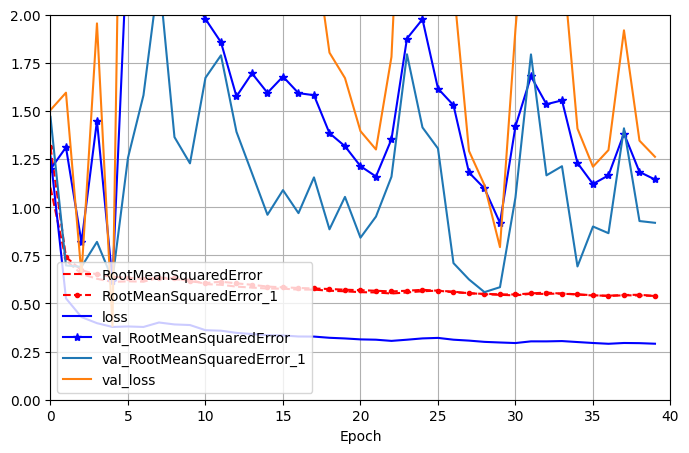

In [30]:
hist = doit(epochs=40)
plot(hist)

Give the deep side everything, but restrict the wide side

In [14]:
# Note the offsets are used here to split up the features according to our input layer
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, :] 
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, :] 
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, :] 

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.5414 - RootMeanSquaredError_1: 1.8235 - loss: 2.6065 - val_RootMeanSquaredError: 0.7772 - val_RootMeanSquaredError_1: 1.3224 - val_loss: 0.7182
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.7586 - RootMeanSquaredError_1: 0.8009 - loss: 0.5842 - val_RootMeanSquaredError: 0.6454 - val_RootMeanSquaredError_1: 0.8521 - val_loss: 0.4474
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6752 - RootMeanSquaredError_1: 0.6903 - loss: 0.4588 - val_RootMeanSquaredError: 0.6149 - val_RootMeanSquaredError_1: 0.7230 - val_loss: 0.3924
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6405 - RootMeanSquaredError_1: 0.6541 - loss: 0.4125 - val_RootMeanSquaredError: 0.7637 - val_RootMeanSquaredError_1: 0.6281 - val_loss: 0.5642
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6203 - RootMeanSquaredError_1: 0.6

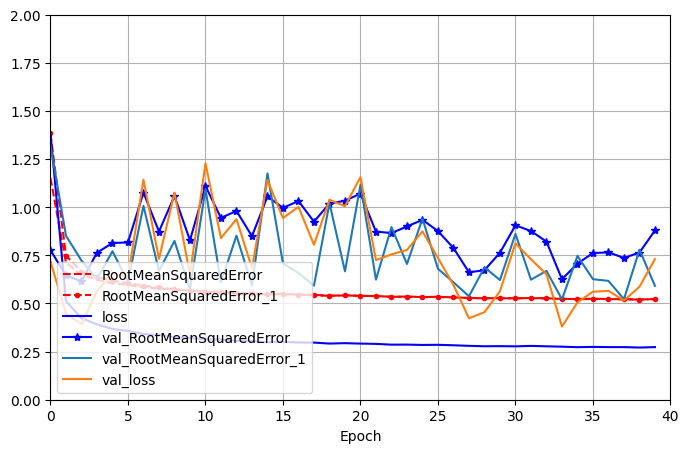

In [13]:
hist = doit(epochs=40)
plot(hist)

Let's try further restricting our wide layer

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.5579 - RootMeanSquaredError_1: 2.0232 - loss: 2.7252 - val_RootMeanSquaredError: 0.7533 - val_RootMeanSquaredError_1: 3.7956 - val_loss: 1.9504
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.7305 - RootMeanSquaredError_1: 0.8547 - loss: 0.5551 - val_RootMeanSquaredError: 0.6298 - val_RootMeanSquaredError_1: 2.2269 - val_loss: 0.8526
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6530 - RootMeanSquaredError_1: 0.7196 - loss: 0.4362 - val_RootMeanSquaredError: 0.6255 - val_RootMeanSquaredError_1: 1.3500 - val_loss: 0.5342
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6240 - RootMeanSquaredError_1: 0.6667 - loss: 0.3952 - val_RootMeanSquaredError: 0.6122 - val_RootMeanSquaredError_1: 0.8699 - val_loss: 0.4128
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6084 - RootMeanSquaredError_1: 0.6

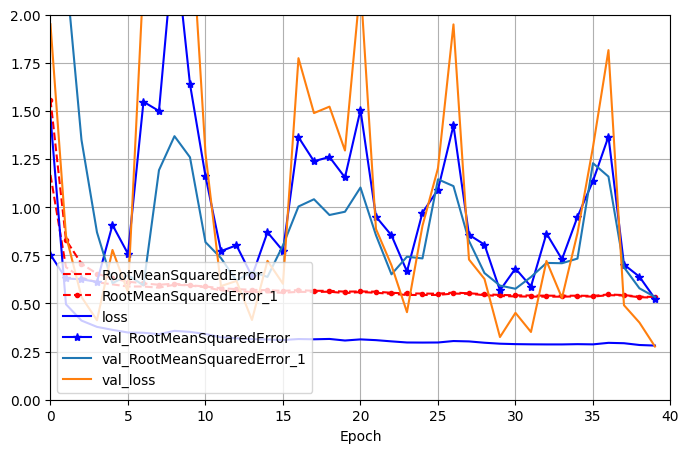

In [14]:
# Note the offsets are used here to split up the features according to our input layer
X_train_wide, X_train_deep = X_train[:, :4], X_train[:, :] 
X_valid_wide, X_valid_deep = X_valid[:, :4], X_valid[:, :] 
X_test_wide, X_test_deep = X_test[:, :4], X_test[:, :] 

hist=doit(epochs=40)
plot(hist)

Try swish

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.6690 - RootMeanSquaredError_1: 1.9740 - loss: 3.0505 - val_RootMeanSquaredError: 1.1474 - val_RootMeanSquaredError_1: 0.9977 - val_loss: 1.2838
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6992 - RootMeanSquaredError_1: 0.7353 - loss: 0.4949 - val_RootMeanSquaredError: 1.4778 - val_RootMeanSquaredError_1: 2.0492 - val_loss: 2.3842
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6444 - RootMeanSquaredError_1: 0.6705 - loss: 0.4189 - val_RootMeanSquaredError: 1.3717 - val_RootMeanSquaredError_1: 0.6350 - val_loss: 1.7329
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6284 - RootMeanSquaredError_1: 0.6341 - loss: 0.3957 - val_RootMeanSquaredError: 0.6563 - val_RootMeanSquaredError_1: 1.4445 - val_loss: 0.5961
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6163 - RootMeanSquaredError_1: 0.6

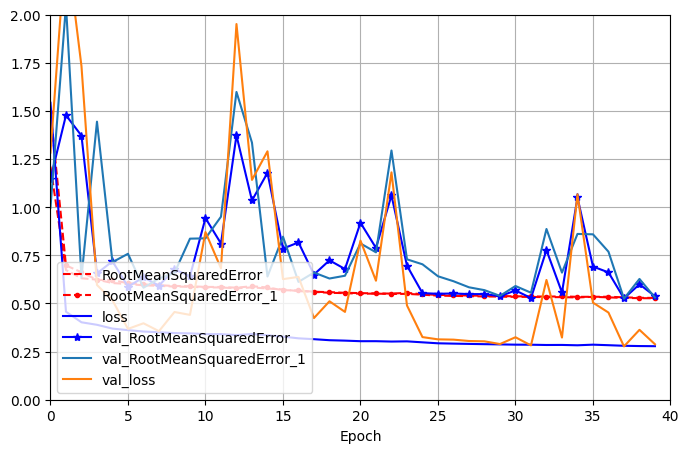

In [15]:
# Note the offsets are used here to split up the features according to our input layer
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, :] 
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, :] 
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, :] 
hist = doit("swish",40)
plot(hist)

Try swish with different data (all data, both sides)

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.5315 - RootMeanSquaredError_1: 1.8047 - loss: 2.5473 - val_RootMeanSquaredError: 0.7994 - val_RootMeanSquaredError_1: 2.5035 - val_loss: 1.2014
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7070 - RootMeanSquaredError_1: 0.7382 - loss: 0.5054 - val_RootMeanSquaredError: 0.9027 - val_RootMeanSquaredError_1: 1.5565 - val_loss: 0.9753
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6509 - RootMeanSquaredError_1: 0.6614 - loss: 0.4254 - val_RootMeanSquaredError: 0.6758 - val_RootMeanSquaredError_1: 0.7023 - val_loss: 0.4603
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6292 - RootMeanSquaredError_1: 0.6326 - loss: 0.3965 - val_RootMeanSquaredError: 1.0164 - val_RootMeanSquaredError_1: 0.8196 - val_loss: 0.9966
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6200 - RootMeanSquaredError_1: 0.6

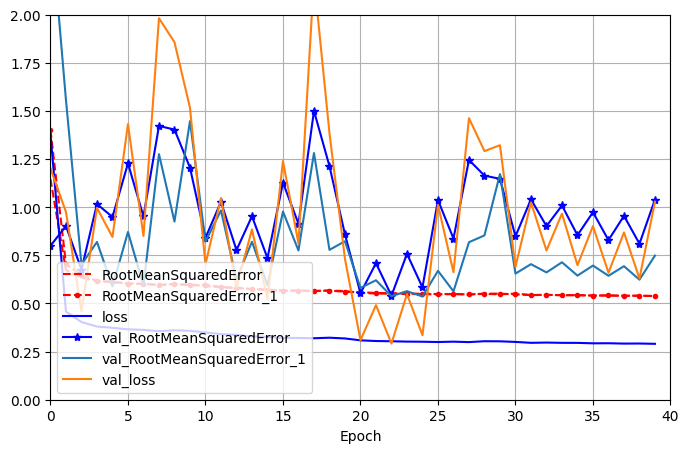

In [16]:
# Note the offsets are used here to split up the features according to our input layer
X_train_wide, X_train_deep = X_train[:, :], X_train[:, :] 
X_valid_wide, X_valid_deep = X_valid[:, :], X_valid[:, :] 
X_test_wide, X_test_deep = X_test[:, :], X_test[:, :] 
hist = doit("swish",40)
plot(hist)

## Exercise 2: Modifying the Wide and Deep Network

1. Modify the constructor of the wide and deep network to take parameters that govern the number of hidden layers and their width.  Now try running the new network with different properties for your hidden layers.  Can you improve your performance?

2. Modify the network class to use BatchNormalization, but add normalization after the activation function.  Examine your performance.

3. Modify the preceding class to use BatchNormalization before the activation function.  Examine your performance. 

In [48]:
import tensorflow as tf

tf.keras.backend.clear_session()

class PlainHiddenLayer(tf.keras.layers.Layer):
    def __init__(self,size,activation,name="Plain"):
        super().__init__()
        self.hidden = tf.keras.layers.Dense(size, activation=activation,kernel_initializer="he_normal",name=name)

    def call(self,inputs):
        return self.hidden(inputs)
        
        
class BatchNormalizedLayerBeforeActivation:
    def __init__(self,size,activation,name="BatchNormalizedBefore"):
        self.hidden = tf.keras.layers.Dense(size, use_bias=False,kernel_initializer="he_normal",name=name)
        self.batch_norm = tf.keras.layers.BatchNormalization()
        self.activation = tf.keras.layers.Activation(activation) 
    
    def wire(self,layer):
        h = self.hidden(layer)
        n = self.batch_norm(h)
        a = self.activation(n)
        return a


class BatchNormalizedLayerAfterActivation:
    def __init__(self,size,activation,name="BatchNormalizedAfter"):
        self.hidden = tf.keras.layers.Dense(size, activation=activation,
                            kernel_initializer="he_normal",name=name),
        self.batch_norm = tf.keras.layers.BatchNormalization()

    def wire(self,layer):
        h = self.hidden(layer)
        n = self.batch_norm(h)
        return n

         

class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, layers = 2, activation="relu", norm=None, **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        
        self.hidden_layers = []
        for i in range(layers):

            #print(f"Adding {i}")
            #self.hidden_layers.append(PlainHiddenLayer(units,activation))
            if norm is None:
                l = PlainHiddenLayer(units,activation)
            elif norm=="before":
                l = BatchNormalizedLayerBeforeActivation(units,activation)
            elif norm=="after":
                l=BatchNormalizedLayerAfterActivation(units,activation)
            
            self.hidden_layers.append(l)
            setattr(WideAndDeepModel,f"hidden_{i}",l)

        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        
        last = norm_deep
        for l in self.hidden_layers:
            last = l.wire(last)
            
        concat = tf.keras.layers.concatenate([norm_wide, last])
        output = self.main_output(concat)
        aux_output = self.aux_output(last)
        return output, aux_output

# Example instantiation
tf.random.set_seed(42)  # For reproducibility
model = WideAndDeepModel(30, activation="relu", layers = 4, name="my_cool_model")
model.summary()


Model: "my_cool_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_1 (Normalization) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ plain_hidden_layer              │ ?                      │   0 (unbuilt) │
│ (PlainHiddenLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ plain_hidden_layer_1            │ ?                      │   0 (unbuilt) │
│ (PlainHiddenLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ plain_hidden_layer_2            │ ?                      │   0 (unbuilt) │
│ (PlainHiddenLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ plain_hidden_layer_3            │ ?                      │   0 (unbuilt) │
│ (PlainHiddenLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
def doit(activation="relu",epochs=20, layers=2, norm=None):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)  # extra code – just for reproducibility
    model = WideAndDeepModel(30, activation=activation, layers=layers, norm=norm, name="my_cool_model")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
                metrics=["RootMeanSquaredError","RootMeanSquaredError"])
    model.norm_layer_wide.adapt(X_train_wide)
    model.norm_layer_deep.adapt(X_train_deep)
    history = model.fit(
        (X_train_wide, X_train_deep), (y_train, y_train), epochs=epochs,
        validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
    return history

In [36]:
model = WideAndDeepModel(30, activation="relu", layers=2, norm=None, name="my_cool_model")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
                metrics=["RootMeanSquaredError","RootMeanSquaredError"])
model.summary()

Model: "my_cool_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_3 (Normalization) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 2.9751 - RootMeanSquaredError_1: 2.3541 - loss: 8.7107 - val_RootMeanSquaredError: 2.9230 - val_RootMeanSquaredError_1: 2.1353 - val_loss: 8.1422
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 1.6045 - RootMeanSquaredError_1: 1.3474 - loss: 2.5031 - val_RootMeanSquaredError: 1.6216 - val_RootMeanSquaredError_1: 1.2979 - val_loss: 2.5344
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.2195 - RootMeanSquaredError_1: 1.1539 - loss: 1.4731 - val_RootMeanSquaredError: 1.1079 - val_RootMeanSquaredError_1: 1.0759 - val_loss: 1.2201
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.0611 - RootMeanSquaredError_1: 1.0734 - loss: 1.1298 - val_RootMeanSquaredError: 0.9855 - val_RootMeanSquaredError_1: 1.0393 - val_loss: 0.9819
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.9945 - RootMeanSquaredError_1: 1.0

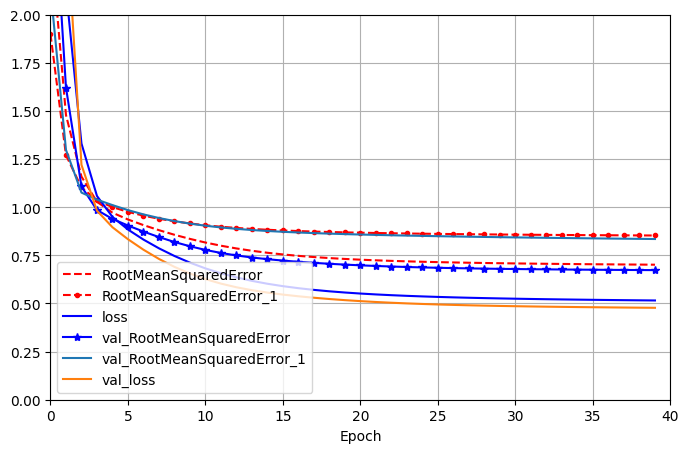

In [35]:
hist = doit(layers=2,epochs=40)
plot(hist)

In [43]:
len(hist.history.get(list(hist.history)[0]))

60

## Exercise 3: Comparing SELU and ReLU

Let's examine the performance of SELU and ReLU in the context of a deep network with 100 layers.  I've set up the example below to use SELU and Lecun Normalization.  Examine the performance, and then contrast using ReLU and He normalization.

In [45]:
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# 100 hidden layers
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="selu",
                                    kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Get the data and train the network:

In [46]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Remember to scale the inputs!
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5


2024-04-02 16:02:30.244592: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.4532 - loss: 1.4519 - val_accuracy: 0.7324 - val_loss: 0.7724
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7351 - loss: 0.7344 - val_accuracy: 0.7778 - val_loss: 0.6074
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7896 - loss: 0.5959 - val_accuracy: 0.7978 - val_loss: 0.5458
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8128 - loss: 0.5332 - val_accuracy: 0.8010 - val_loss: 0.5383
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8291 - loss: 0.4919 - val_accuracy: 0.8066 - val_loss: 0.5091


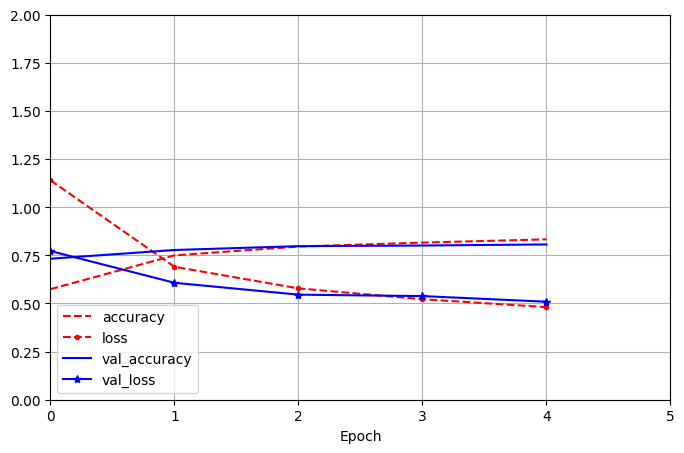

In [52]:
plot(history)

In [53]:
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# 100 hidden layers
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

history_relu = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


2024-04-02 16:06:38.466361: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1717/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0994 - loss: 2.3026

2024-04-02 16:06:53.150361: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.0994 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3026
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.1027 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3026
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.1029 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3027
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.1029 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3027
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.1029 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3027


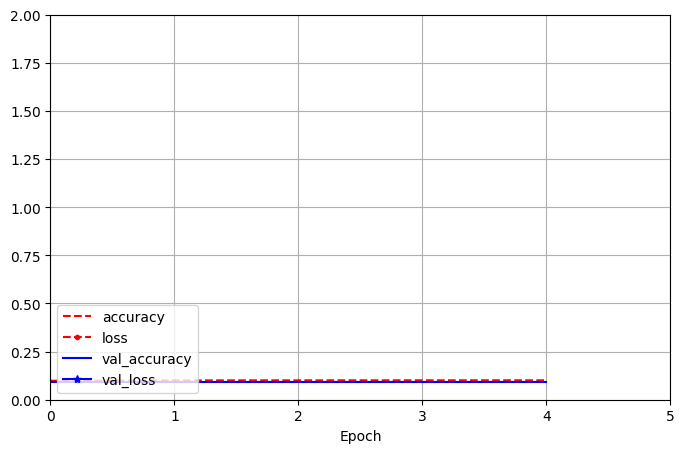

In [54]:
plot(history_relu)